In [19]:
class BabyNames(object):
    def __init__(self, path):
        self.path = path
        self.dataframe = 5 #pd.read_csv(r'self.path') #TODO : use pandas to create a dataframe with path
    def count(self):
        #TODO : use the dataframe in the class to get
        print(self.dataframe)
        return self.dataframe
        

In [24]:
b = BabyNames("random")
a = b.count()

5


In [25]:
a

5

In [425]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


class BabyNames:
    def __init__(self, path):
        filepath = r'%s' % path
        allFiles = glob.glob(filepath + "/CA.TXT")
        #print(allFiles)
        dFrame = pd.DataFrame()
        list_ = []
        columns = ['State','Sex','YOB', 'Name', 'Births']

        for file_ in allFiles:
            df = pd.read_csv(file_,index_col=None, header=None, names=columns)
            list_.append(df)
        self.dFrame = pd.concat(list_)

    def count(self, state = None , year = None):
        nan = np.nan
        query = 'State != @nan'

        if state != None: query = query + " & State == @state"
 
        if year != None: query = query + (" & YOB == @year")

        counts = self.dFrame.query(query).Births.sum()
        #print(self.dFrame.query(query))
        return counts
   
    def Top10BabyNames(self, state = None , year = None):
        nan = np.nan
        query = 'State != @nan'

        if state != None: query = query + " & State == @state"
        if year != None: query = query + (" & YOB == @year")
        
        fQuery = query + (" & Sex == 'F'")
        mQuery = query + (" & Sex == 'M'")

        fTopnames = self.dFrame.query(fQuery).groupby('Name').Births.sum().reset_index()
        fTopnames.columns = ['Name','TotalBirths']
        fTopnames = fTopnames.sort_values(by=['TotalBirths'], ascending = False).reset_index(drop = True).head(10)
        
        mTopnames = self.dFrame.query(mQuery).groupby('Name').Births.sum().reset_index()
        mTopnames.columns = ['Name','TotalBirths']
        mTopnames = mTopnames.sort_values(by=['TotalBirths'], ascending = False).reset_index(drop = True).head(10)
        
#         print(fTopnames)
#         print(mTopnames)
        
        print('\033[1m%16s  %16s  %16s\033[0m' % ("Rank", "Male", "Female"))
        for n in range(10):
            print('%16s  %16s  %16s' % (n+1, mTopnames['Name'][n], fTopnames['Name'][n]))
        #topnames.sort_values(['TotalBirths'])
        
        #print(self.dFrame.query(query))
        # return topnames

        
    def ChangeofPopularity(self, fromYear = None, toYear = None, top = 10):
        query = ""
        if fromYear is None or toYear is None :
            print("Please give in the required inputs for fromYear and toYear")
            return
            
        fromquery = query + ("YOB == @fromYear")
        old_names = self.dFrame.query(fromquery).groupby('Name').Births.sum().reset_index()
        old_names.columns = ['Name','TotalBirths']
        old_names = old_names.sort_values(by=['TotalBirths'], ascending = False).reset_index(drop = True)
        old_names['OldRank'] = old_names.index + 1
        old_names = old_names.set_index('Name')
        
        
        toquery = query + ("YOB == @toYear")
        new_names = self.dFrame.query(toquery).groupby('Name').Births.sum().reset_index()
        new_names.columns = ['Name','TotalBirths']
        new_names = new_names.sort_values(by=['TotalBirths'], ascending = False).reset_index(drop = True)
        new_names['NewRank'] = new_names.index + 1
        new_names = new_names.set_index('Name')
        
        final = pd.concat([old_names, new_names], axis=1, join='inner').reset_index()
        final['PercentageChange'] = (100 * (final['OldRank'] - final['NewRank'])) / final['OldRank']
        final = final.sort_values(by=['PercentageChange'], ascending = False).reset_index(drop = True)
        
        topNamesIncPop = final.head(top)
        topNamesDecPop = final.tail(top).sort_values(by=['PercentageChange'])
        topNamesSamePop = final[final['PercentageChange'] == 0]
    
        print(topNamesIncPop)
        print(topNamesDecPop)
        print(topNamesSamePop)
        
        
    def Top5NamesPerYear(self, year = None, sex = None):
        if year is None :
            print("Please give in the required input for the year you want")
            return
        query = "YOB == @year"
        if sex != None:
            query = query + "  & Sex == @sex"
            
        groupednamequery = self.dFrame.query(query).groupby(['State','Name']).Births.sum().reset_index()
        groupednamequery.columns = ['State','Name','TotalBirths']
        groupednamequery = groupednamequery.sort_values(by=['State','TotalBirths'], ascending = [True, False]).reset_index(drop = True)
        topNamesForEachState = groupednamequery.groupby(['State']).head(5).reset_index(drop = True)
        
        topNamesForEachState['Rank'] = topNamesForEachState.groupby('State')['TotalBirths'].rank(method='first', ascending = False).astype(int)
        topNamesForEachState = topNamesForEachState.set_index('State')
#         RankDetails = []
#         for i in [1,2,3,4,5]:
#             RankDetails.append(topNamesForEachState[topNamesForEachState['Rank'] == i])

        f = lambda x: topNamesForEachState[topNamesForEachState.Rank == x]

        horizTop5NamesPerYr = pd.concat([f(i) for i in range(1,6)], axis = 1)
        
        horizTop5NamesPerYr = horizTop5NamesPerYr.drop('Rank', 1)
        
        horizTop5NamesPerYr.columns = ['Rank 1','Num', 'Rank 2','Num', 'Rank 3','Num', 'Rank 4','Num', 'Rank 5','Num']
        
        print(horizTop5NamesPerYr)

#         #for i in range(1,6):
#         rank1 = topNamesForEachState[topNamesForEachState['Rank'] == 1]
#         rank2 = topNamesForEachState[topNamesForEachState['Rank'] == 2]
#         rank3 = topNamesForEachState[topNamesForEachState['Rank'] == 3]
        
# #         print(rank1)
# #         print(rank2)
# #         print(rank3)
        
#         merged = pd.concat([rank1, rank2, rank3], axis=1, join='inner')
#         print(merged)
#         print(merged[['Name', 'TotalBirths']])

    def NamePopularityPlot(self, name = None, yearRange = None, state = None, sex = None ):
        if name is None or yearRange is None or state is None or sex is None:
            print("Input the arguments as specified in the documentation")
            return
        fromYr = yearRange[0]
        toYr = yearRange[1]
        query = "YOB >= @fromYr & YOB <= @toYr & State == @state & Sex == @sex"
        getName = query + " & Name == @name"
        plotnamequery = self.dFrame.query(getName).reset_index(drop = True)
        
        
        if plotnamequery.shape[0] < 2:
            print("Not enough data to plot a line chart of significance.")
            return
        
        proportionquery = self.dFrame.query(query).groupby(['YOB']).Births.sum().reset_index()
        proportionquery.columns = ['YOB','TotalBirths']
        plotnamequery = plotnamequery.set_index('YOB')
        proportionquery = proportionquery.set_index('YOB')
        plotnamequery = pd.concat([plotnamequery, proportionquery], axis=1, join='inner').reset_index()
        plotnamequery["Popularity"] = 100*(plotnamequery["Births"])/plotnamequery["TotalBirths"]

        
        plotnamequery.plot(x = 'YOB', y = 'Popularity')
        
    def NameFlip(self, n = 10):
        malenames = self.dFrame[self.dFrame.Sex == 'M']
        malenames = malenames.groupby(["Name", "YOB"]).Births.sum()
        femalenames = self.dFrame[self.dFrame.Sex == 'F']
        femalenames = femalenames.groupby(["Name", "YOB"]).Births.sum()
        
        #concatenatedlist = malenames.set_index('Name', 'YOB').join(femalenames.set_index('Name', 'YOB'), lsuffix='_male', rsuffix='_female', how = 'inner')
        
        concatenatedlist = pd.concat([malenames,femalenames],axis=1, join='inner')
        concatenatedlist.columns = ["MaleBirths","FemaleBirths"]
        concatenatedlist['Winner'] = 'F'
        concatenatedlist.loc[concatenatedlist.MaleBirths > concatenatedlist.FemaleBirths, 'Winner'] = 'M'
        concatenatedlist.reset_index()
        concatenatedlist['PrevWinner'] = concatenatedlist.groupby('Name').Winner.shift(1)
        
        concatenatedlist['Flipped'] = 'N'
        concatenatedlist.loc[(concatenatedlist['Winner'] != concatenatedlist['PrevWinner']) & (concatenatedlist['PrevWinner'].isin(['M', 'F'])), 'Flipped'] = 'Y'
        
        flippeddf = concatenatedlist[concatenatedlist["Flipped"] == "Y"]
        NumberOfFlips = flippeddf.groupby("Name").size().reset_index()
        NumberOfFlips.columns = ['Name', 'FlipCount']
        
        NumberOfFlips = NumberOfFlips.sort_values(by='FlipCount', ascending = False).head(n).reset_index()
        #print( flippeddf.to_string())
        
        NamesList = NumberOfFlips.Name
        print(NamesList)

        i = 0
        fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 24), sharex=True)
        for name in NamesList:
            x = i // 2
            y = i % 2
            table = self.dFrame[self.dFrame.Name == name].pivot_table(values='Births', index=['YOB'], columns=['Sex'], aggfunc=sum)
            table.plot(style={'M': 'k-', 'F': 'k--'}, ax=axes[x,y], title=name)
            i = i + 1

        plt.show()
        
        


In [426]:
example = BabyNames('../Documents/Python Java/Lab Notebooks Download/Project 1/namesbystate')

0    Trinidad
1       Carey
2      Michel
3     Carroll
4        Shay
5        Sage
6       Kerry
7        Rian
8        Cruz
9      Reilly
Name: Name, dtype: object


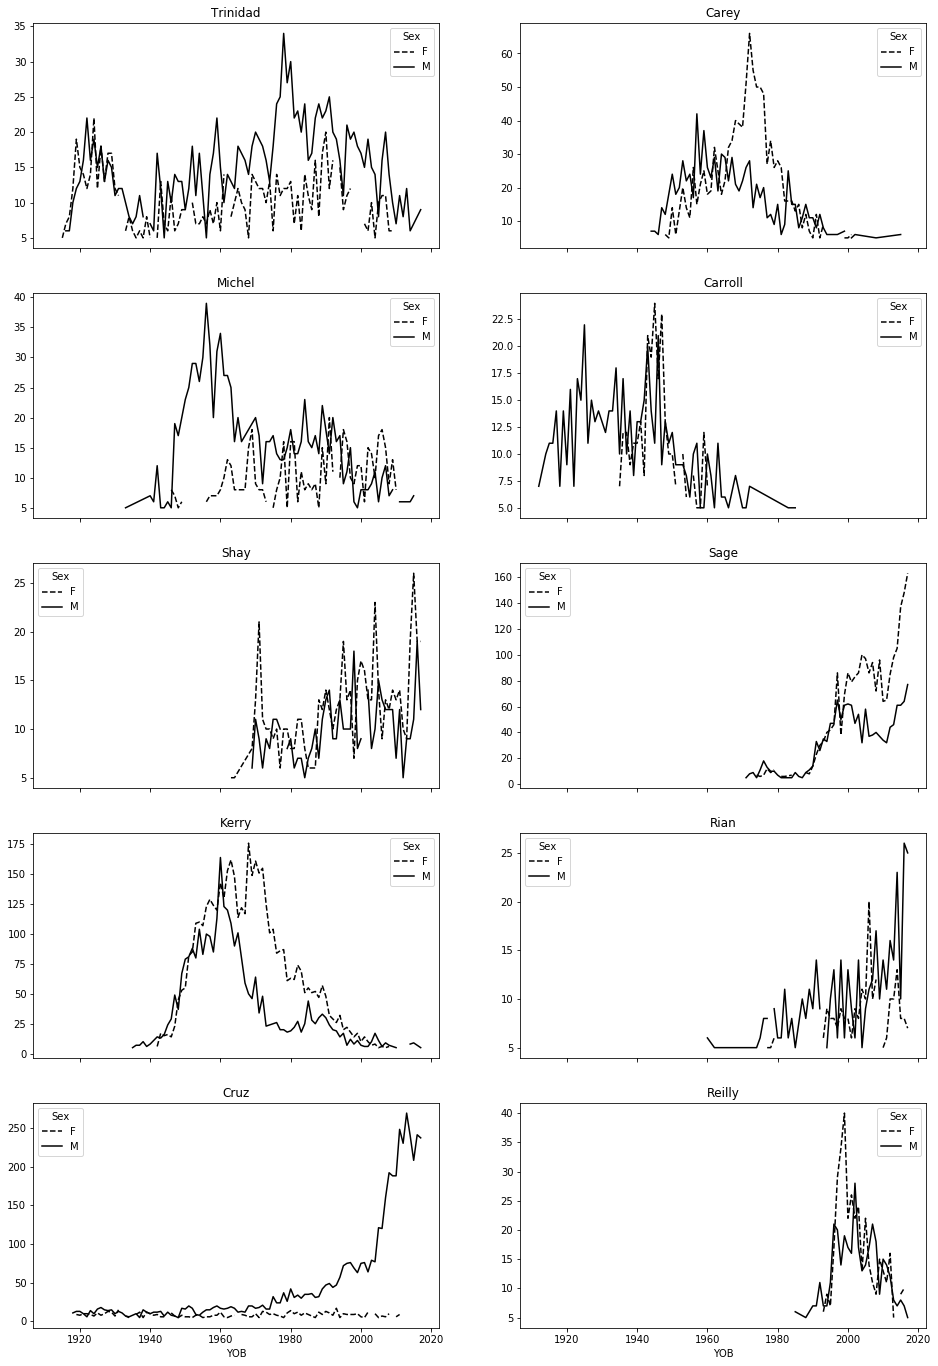

In [427]:
example.NameFlip()

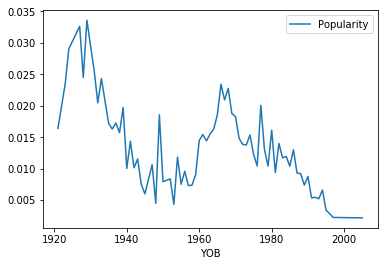

In [268]:
example.NamePopularityPlot("John", (1910,2010), "CA", "F")

In [174]:
example.Top5NamesPerYear(2015, 'F')

       Rank 1   Num  Rank 2   Num  Rank 3   Num    Rank 4   Num    Rank 5  \
State                                                                       
CA     Sophia  2954     Mia  2861    Emma  2720    Olivia  2527  Isabella   
CO       Emma   355  Olivia   347     Mia   254    Evelyn   251    Sophia   
CT     Sophia   217    Emma   203  Olivia   201  Isabella   186       Ava   

        Num  
State        
CA     2401  
CO      249  
CT      184  


In [37]:
example.count(state ='CO', year = '1910')

3609

In [45]:
example.count(state ='CO')

3627048

In [39]:
example.count()

37621792

In [152]:
example.Top10BabyNames(state ='CO', year = '1910')

            Rank              Male            Female
               1              John              Mary
               2             James             Helen
               3           William           Dorothy
               4           Charles              Ruth
               5            Robert          Margaret
               6            George           Frances
               7             Frank             Alice
               8               Joe         Elizabeth
               9            Joseph           Mildred
              10              Fred              Anna


In [153]:
example.Top10BabyNames(year = '1910')

            Rank              Male            Female
               1              John              Mary
               2           William             Helen
               3             James           Dorothy
               4            George          Margaret
               5            Joseph              Ruth
               6             Frank           Frances
               7            Robert             Alice
               8           Charles         Elizabeth
               9            Edward              Anna
              10            Walter              Rose


In [154]:
example.Top10BabyNames()

            Rank              Male            Female
               1           Michael              Mary
               2            Robert          Jennifer
               3             David         Elizabeth
               4              John           Jessica
               5             James          Patricia
               6            Daniel             Linda
               7           William          Michelle
               8           Richard             Susan
               9       Christopher           Barbara
              10            Joseph              Lisa


In [137]:
example.dFrame

,State,Sex,YOB,Name,Births
0,CO,F,1910,Mary,193
1,CO,F,1910,Helen,112
2,CO,F,1910,Dorothy,87
3,CO,F,1910,Ruth,68
4,CO,F,1910,Margaret,67
5,CO,F,1910,Frances,56
6,CO,F,1910,Alice,46
7,CO,F,1910,Elizabeth,46
8,CO,F,1910,Anna,42
9,CO,F,1910,Mildred,42


In [179]:
example.ChangeofPopularity()

Please give in the required inputs for fromYear and toYear


In [224]:
example.ChangeofPopularity(fromYear = 1980, toYear = 1990)

       Name  TotalBirths  OldRank  TotalBirths  NewRank  PercentageChange
0     Kayla           15     1934         1855       68         96.483971
1    Ashley          607      137         5617        7         94.890511
2  Brittany          167      460         3540       26         94.347826
3   Kaitlyn            5     3858          519      258         93.312597
4    Taylor          123      570         2130       54         90.526316
5    Colton            5     4005          240      461         88.489388
6   Katelyn           14     1977          554      246         87.556904
7   Chelsea          115      590         1679       75         87.288136
8  Savannah            5     3882          201      521         86.579083
9    Kelsey           69      815         1233      111         86.380368
          Name  TotalBirths  OldRank  TotalBirths  NewRank  PercentageChange
3405     Jason         5304        5         1873       65      -1200.000000
3404  Jennifer         7231     